In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('C:/Users/likhi/OneDrive/Documents/GitHub/redback-fit-sports-performance/Running Analysis/activities_cleaned.csv')

# Parse timestamps
df['Begin Timestamp'] = pd.to_datetime(df['Begin Timestamp'], dayfirst=True, errors='coerce')
df['End Timestamp'] = pd.to_datetime(df['End Timestamp'], dayfirst=True, errors='coerce')

# Convert time durations to seconds
def hms_to_seconds(t):
    try:
        h, m, s = map(int, str(t).split(':'))
        return h * 3600 + m * 60 + s
    except:
        return np.nan

df['Duration_sec'] = df['Duration (h:m:s)'].apply(hms_to_seconds)
df['Moving Duration_sec'] = df['Moving Duration (h:m:s)'].apply(hms_to_seconds)

# Show dataset info and missing values
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Activity ID                            155 non-null    int64         
 1   Activity Type                          155 non-null    object        
 2   Begin Timestamp                        155 non-null    datetime64[ns]
 3   End Timestamp                          155 non-null    datetime64[ns]
 4   Max. Elevation (Raw)                   155 non-null    float64       
 5   Min. Elevation (Raw)                   155 non-null    float64       
 6   Elevation Gain (Raw)                   155 non-null    float64       
 7   Elevation Loss (Raw)                   155 non-null    float64       
 8   Average Heart Rate (bpm)               155 non-null    int64         
 9   Max. Heart Rate (bpm).1                155 non-null    int64     

In [2]:
# Convert speed columns to float
speed_cols = ['Average Moving Speed', 'Average Speed', 'Max. Speed']
for col in speed_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Calories and Rainfall to numeric
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')
df['Rainfall'] = pd.to_numeric(df['Rainfall'], errors='coerce')

# Final data check
print(df[speed_cols + ['Calories', 'Rainfall']].dtypes)


Average Moving Speed    float64
Average Speed           float64
Max. Speed              float64
Calories                float64
Rainfall                float64
dtype: object


In [3]:
print(df.describe())


        Activity ID                Begin Timestamp        End Timestamp  \
count  1.550000e+02                            155                  155   
mean   1.534023e+09  2016-12-24 18:26:14.709677312  2016-12-28 03:50:36   
min    9.083326e+08            2015-01-01 03:34:00  2015-09-24 13:16:00   
25%    1.297725e+09            2016-08-10 11:42:00  2016-08-10 12:34:30   
50%    1.449839e+09            2016-11-16 16:40:00  2016-11-16 17:08:00   
75%    1.743754e+09            2017-05-18 13:11:00  2017-05-18 13:59:00   
max    2.284659e+09            2017-11-04 12:07:00  2017-11-04 13:06:00   
std    2.847469e+08                            NaN                  NaN   

       Max. Elevation (Raw)  Min. Elevation (Raw)  Elevation Gain (Raw)  \
count            155.000000            155.000000            155.000000   
mean             383.125613            383.125613            158.055097   
min              159.800000            159.800000              3.000000   
25%              307.245

In [4]:
print(df.columns.tolist())


['Activity ID', 'Activity Type', 'Begin Timestamp', 'End Timestamp', 'Max. Elevation (Raw)', 'Min. Elevation (Raw)', 'Elevation Gain (Raw)', 'Elevation Loss (Raw)', 'Average Heart Rate (bpm)', 'Max. Heart Rate (bpm).1', 'Average Moving Speed', 'Average Speed', 'Max. Speed', 'Distance (Raw)', 'Duration (h:m:s)', 'Moving Duration (h:m:s)', 'Calories', 'Device', 'Begin Latitude (Decimal Degrees Raw)', 'Begin Longitude (Decimal Degrees Raw)', 'End Latitude (Decimal Degrees Raw)', 'End Longitude (Decimal Degrees Raw)', 'Temperature (Raw)', 'Wind Speed (Raw)', 'Wind Direction', 'Humidity (Raw)', 'Condition', 'Rainfall', 'Duration_sec', 'Moving Duration_sec']


In [5]:
import pandas as pd

# Convert 'Duration (h:m:s)' to seconds
df['Duration_sec'] = pd.to_timedelta(df['Duration (h:m:s)']).dt.total_seconds()

# Convert 'Moving Duration (h:m:s)' to seconds
df['Moving_Duration_sec'] = pd.to_timedelta(df['Moving Duration (h:m:s)']).dt.total_seconds()


In [6]:
numeric_cols = [
    'Distance (Raw)', 'Duration_sec', 'Moving_Duration_sec', 'Calories',
    'Average Heart Rate (bpm)', 'Max. Heart Rate (bpm).1',
    'Elevation Gain (Raw)', 'Elevation Loss (Raw)', 'Temperature (Raw)',
    'Humidity (Raw)', 'Wind Speed (Raw)', 'Rainfall'
]


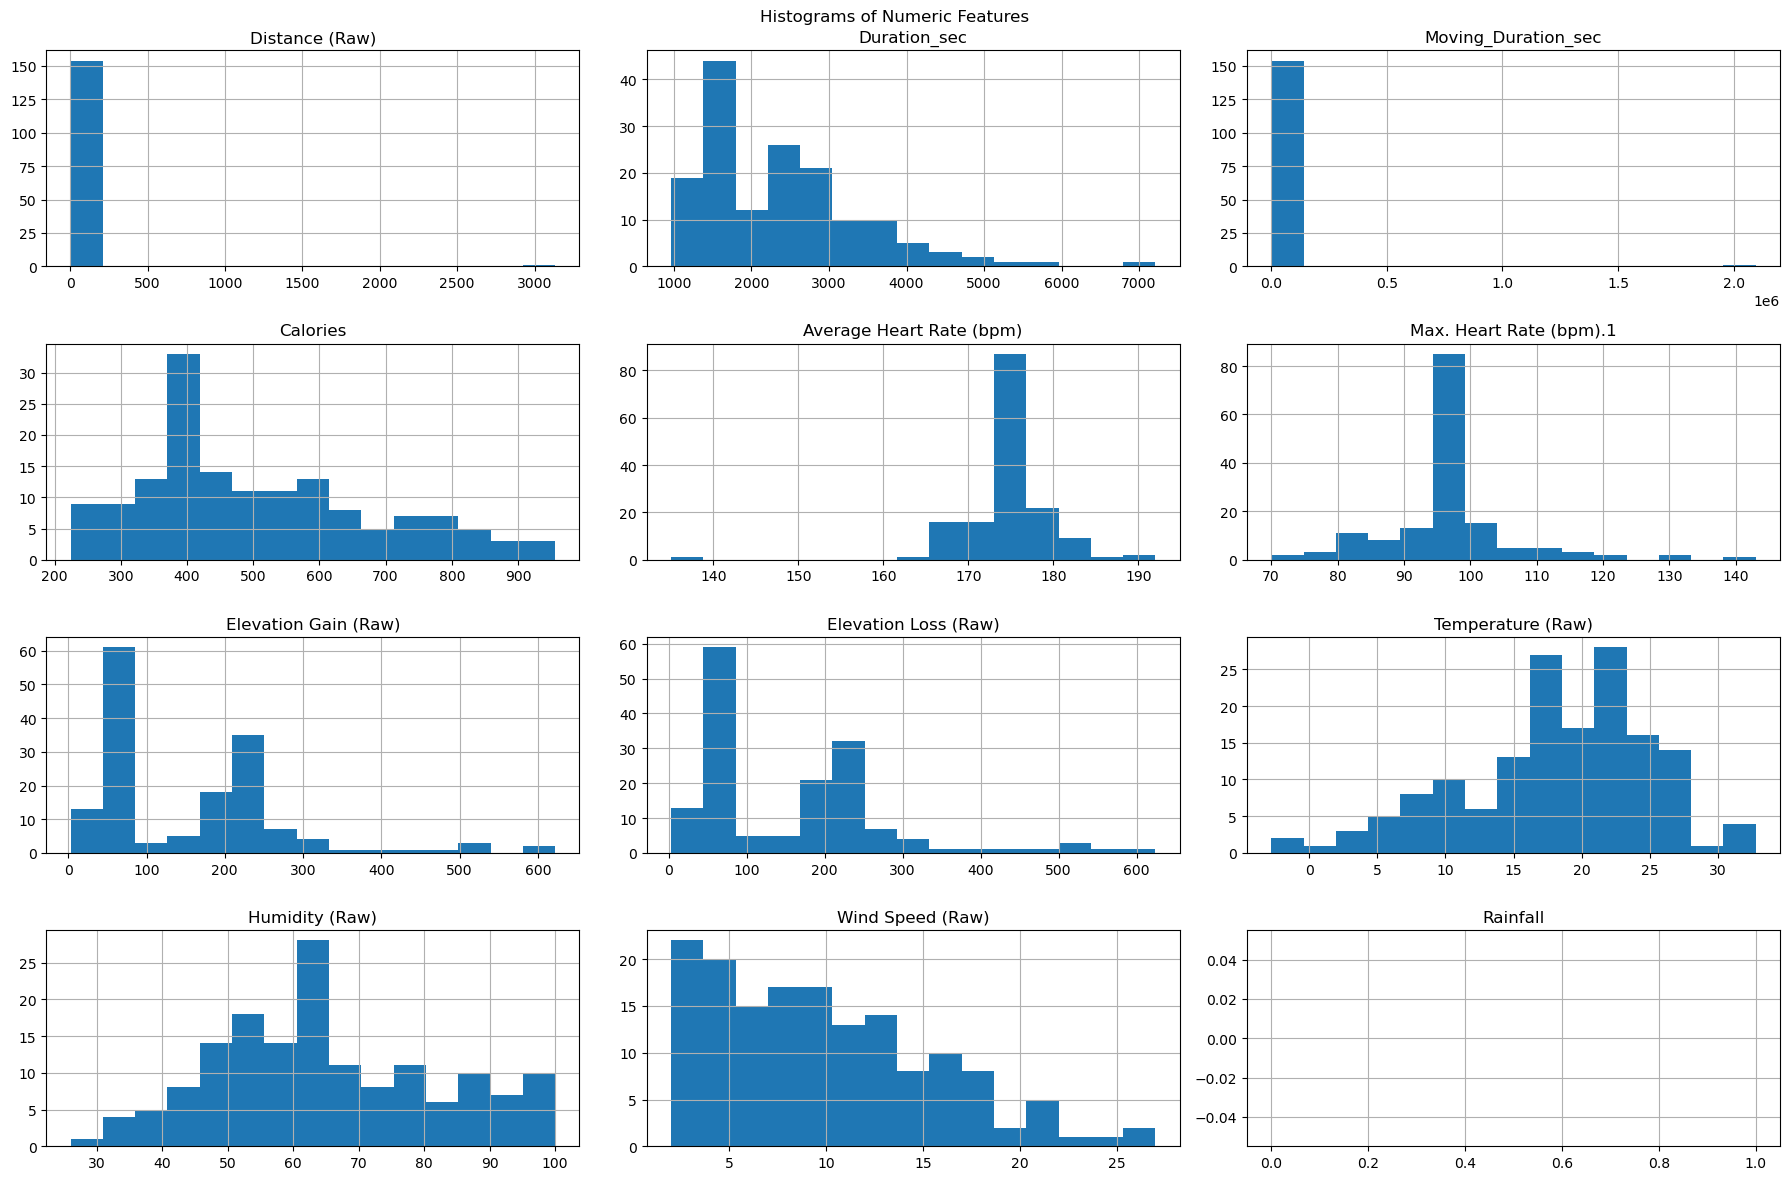

In [7]:
import matplotlib.pyplot as plt

df[numeric_cols].hist(bins=15, figsize=(18, 12))
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


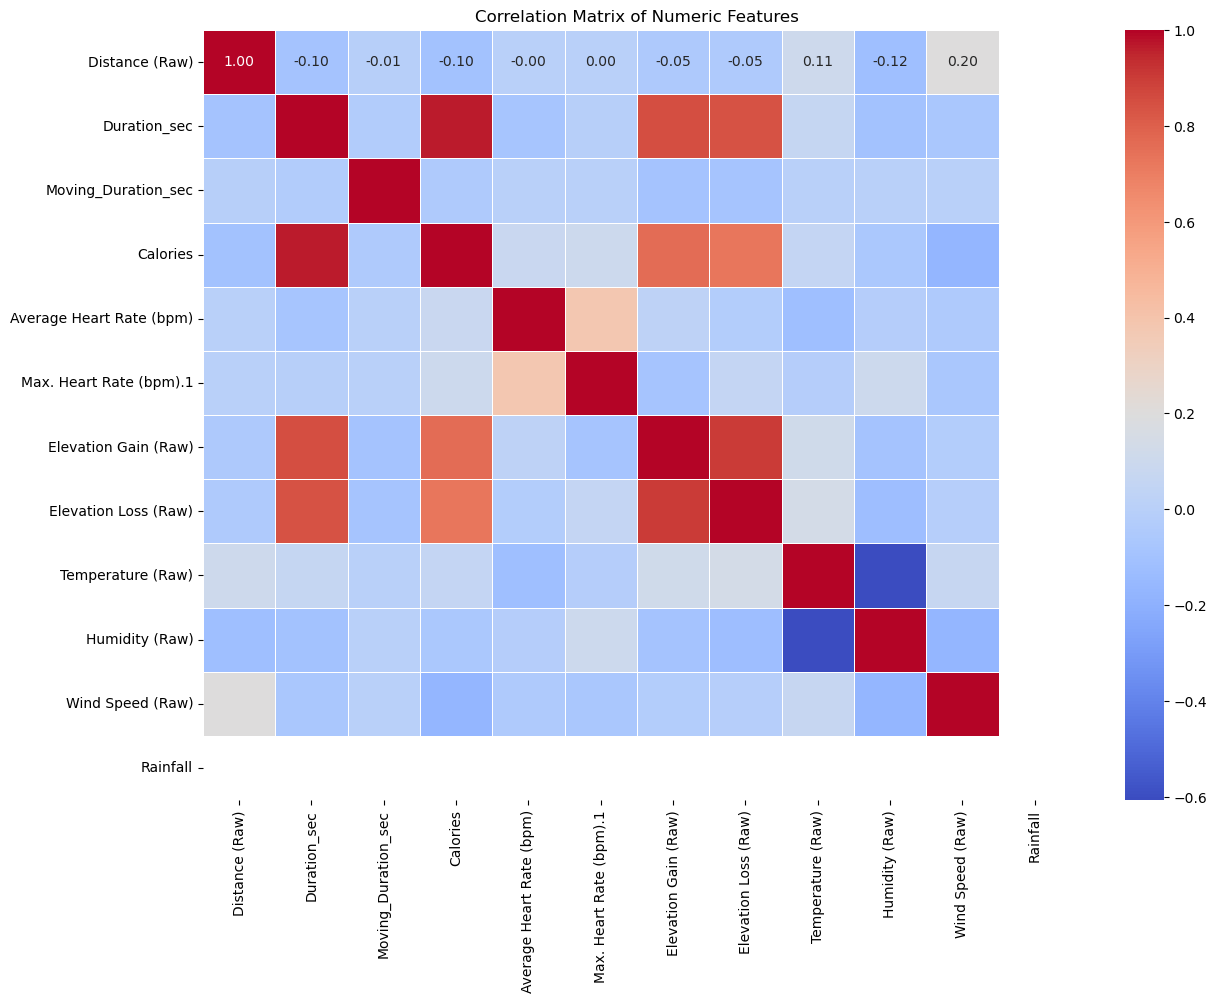

In [8]:
# Remove commas and convert to numeric type for relevant columns
for col in numeric_cols:
    df[col] = df[col].replace({',': ''}, regex=True)  # Remove commas if any
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, forcing errors to NaN

# Now calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot the correlation matrix using a heatmap
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Average Moving Speed    155
Average Speed           155
Max. Speed              155
Calories                  4
Rainfall                155
dtype: int64

In [10]:
# Drop fully missing columns
df = df.drop(columns=['Average Moving Speed', 'Average Speed', 'Max. Speed', 'Rainfall'])

# Impute missing values in 'Calories' with the mean
df['Calories'] = df['Calories'].fillna(df['Calories'].mean())


In [11]:
# Check data types to confirm categorical columns
df.dtypes[['Activity Type', 'Device', 'Condition', 'Wind Direction']]


Activity Type     object
Device            object
Condition         object
Wind Direction    object
dtype: object

In [12]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Activity Type', 'Device', 'Condition', 'Wind Direction'], drop_first=True)


In [13]:
# Count missing values
missing_summary = df.isnull().sum()
missing_summary[missing_summary > 0].sort_values(ascending=False)


Series([], dtype: int64)

In [14]:
# Fill missing values in numerical columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill any remaining object/categorical columns with mode (if any are left)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [15]:
# Convert 'Begin Timestamp' to datetime
df['Begin Timestamp'] = pd.to_datetime(df['Begin Timestamp'])

# Extract temporal features
df['Year'] = df['Begin Timestamp'].dt.year
df['Month'] = df['Begin Timestamp'].dt.month
df['Day'] = df['Begin Timestamp'].dt.day
df['Weekday'] = df['Begin Timestamp'].dt.weekday  # 0 = Monday
df['Hour'] = df['Begin Timestamp'].dt.hour


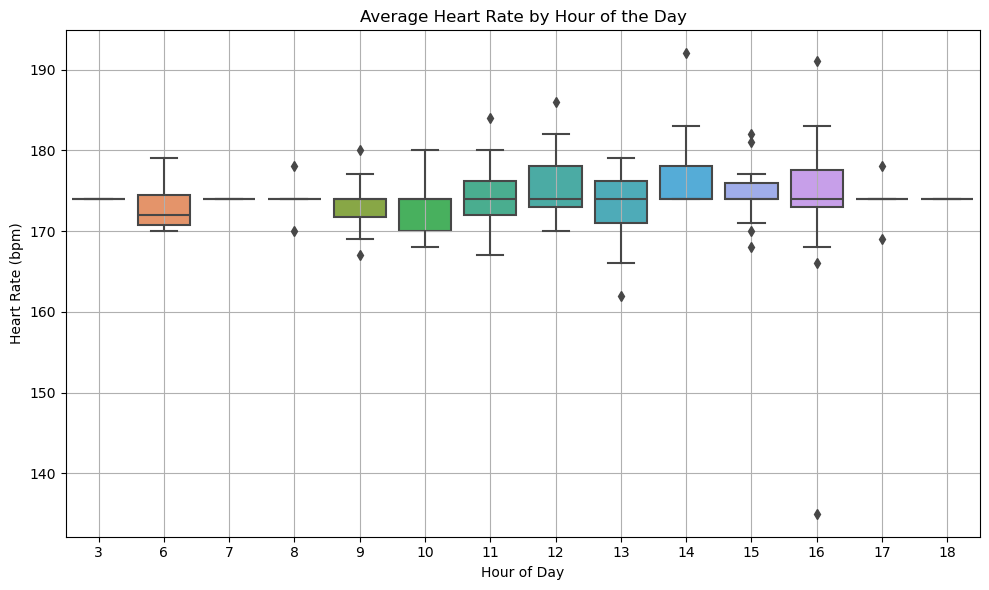

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='Average Heart Rate (bpm)', data=df)
plt.title('Average Heart Rate by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()


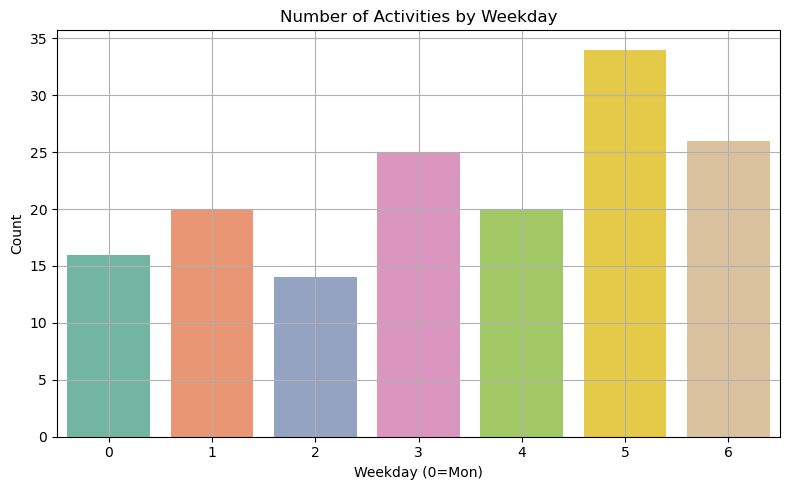

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Weekday', data=df, palette='Set2')
plt.title('Number of Activities by Weekday')
plt.xlabel('Weekday (0=Mon)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


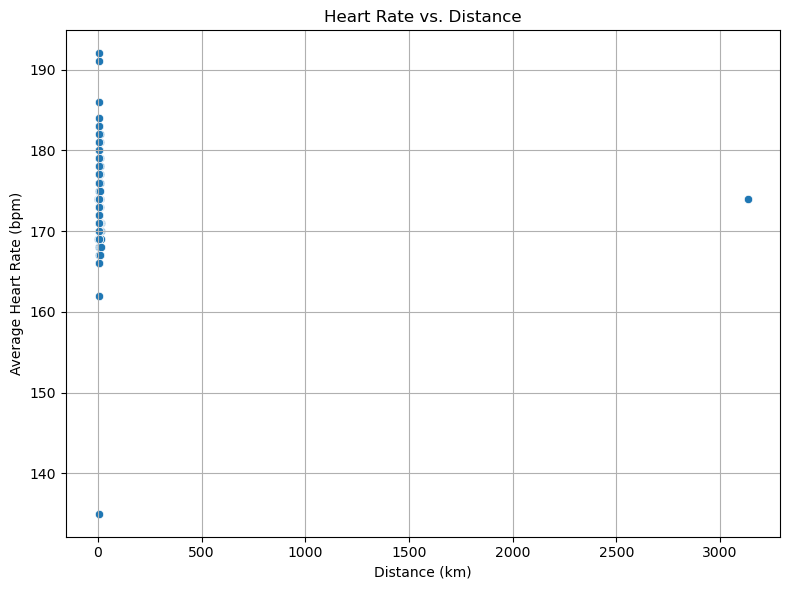

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Distance (Raw)', 
    y='Average Heart Rate (bpm)', 
    data=df
)
plt.title('Heart Rate vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Average Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()


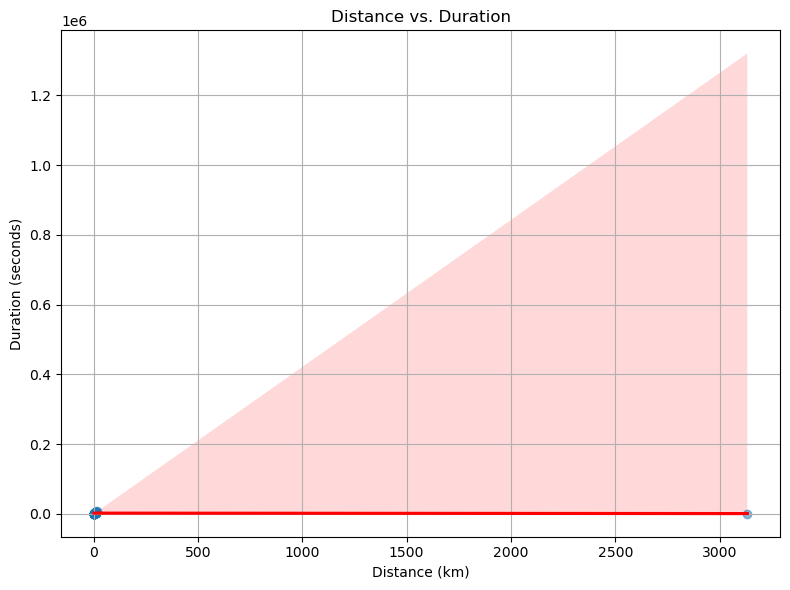

In [19]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Distance (Raw)', 
    y='Duration_sec', 
    data=df, 
    scatter_kws={'alpha':0.5}, 
    line_kws={'color': 'red'}
)
plt.title('Distance vs. Duration')
plt.xlabel('Distance (km)')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


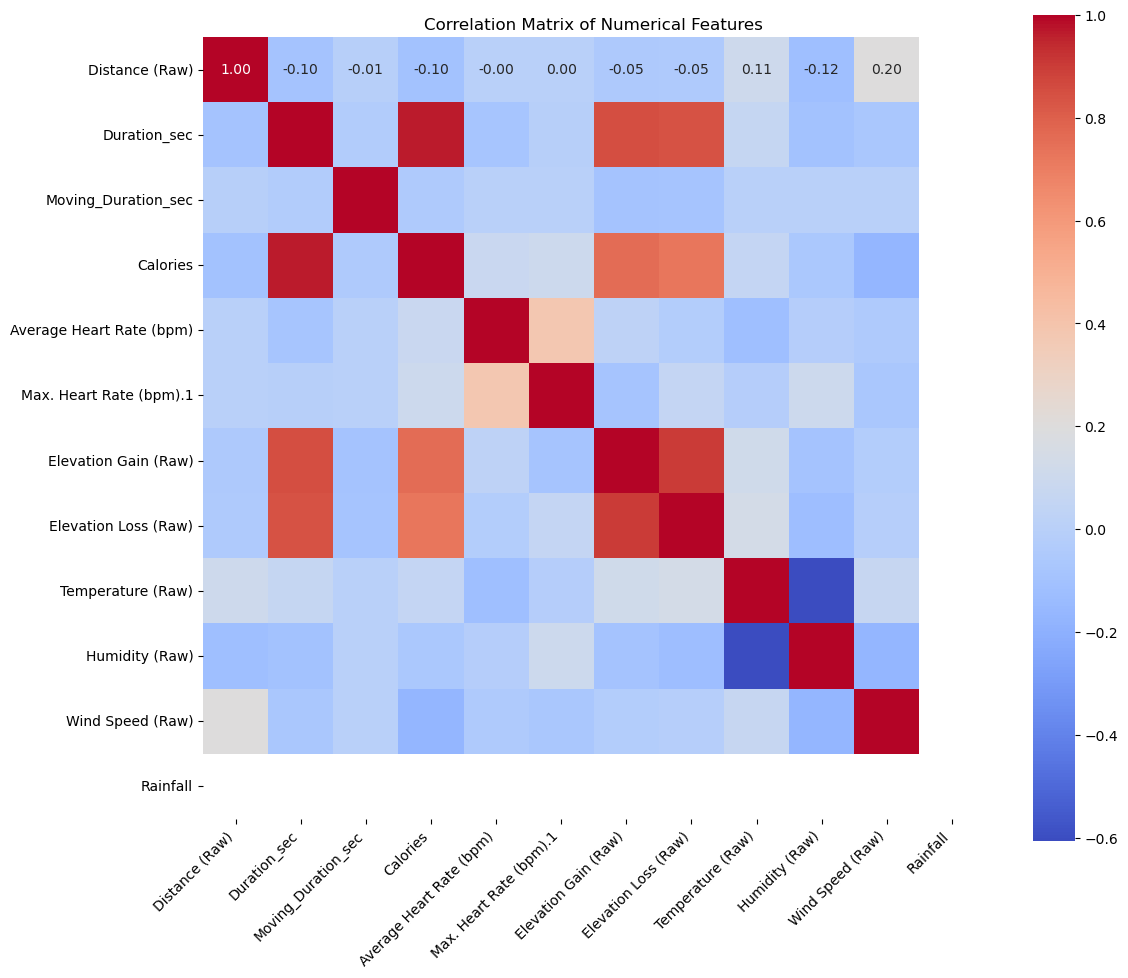

In [20]:
# Plot the correlation matrix with rotated labels
plt.figure(figsize=(12, 10))  # Adjust the figure size for more space
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Rotate the x and y labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, va='center')

plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


In [26]:
# Check the column names in your DataFrame
print(df.columns)


Index(['Activity ID', 'Begin Timestamp', 'End Timestamp',
       'Max. Elevation (Raw)', 'Min. Elevation (Raw)', 'Elevation Gain (Raw)',
       'Elevation Loss (Raw)', 'Average Heart Rate (bpm)',
       'Max. Heart Rate (bpm).1', 'Distance (Raw)', 'Duration (h:m:s)',
       'Moving Duration (h:m:s)', 'Calories',
       'Begin Latitude (Decimal Degrees Raw)',
       'Begin Longitude (Decimal Degrees Raw)',
       'End Latitude (Decimal Degrees Raw)',
       'End Longitude (Decimal Degrees Raw)', 'Temperature (Raw)',
       'Wind Speed (Raw)', 'Humidity (Raw)', 'Duration_sec',
       'Moving Duration_sec', 'Moving_Duration_sec',
       'Device_Vivoactive HR 3.20.0.0', 'Device_Vivoactive HR 3.30.0.0',
       'Device_Vivoactive HR 3.40.0.0', 'Device_Vivoactive HR 3.50.0.0',
       'Device_Vivoactive HR 3.70.0.0', 'Device_Vivoactive HR 3.80.0.0',
       'Device_Vivoactive HR 3.90.0.0', 'Device_Vivoactive HR 4.0.0.0',
       'Device_Vivoactive HR 4.20.0.0', 'Condition_fair',
       'Conditio

In [38]:
# Convert 'Begin Timestamp' and 'End Timestamp' to datetime format
df['Begin Timestamp'] = pd.to_datetime(df['Begin Timestamp'])
df['End Timestamp'] = pd.to_datetime(df['End Timestamp'])

# Extract useful datetime features
df['Start_Year'] = df['Begin Timestamp'].dt.year
df['Start_Month'] = df['Begin Timestamp'].dt.month
df['Start_Day'] = df['Begin Timestamp'].dt.day
df['Start_Hour'] = df['Begin Timestamp'].dt.hour
df['Start_Minute'] = df['Begin Timestamp'].dt.minute
df['Start_Second'] = df['Begin Timestamp'].dt.second

# If necessary, extract features from 'End Timestamp' similarly:
df['End_Year'] = df['End Timestamp'].dt.year
df['End_Month'] = df['End Timestamp'].dt.month
df['End_Day'] = df['End Timestamp'].dt.day
df['End_Hour'] = df['End Timestamp'].dt.hour
df['End_Minute'] = df['End Timestamp'].dt.minute
df['End_Second'] = df['End Timestamp'].dt.second


In [51]:
# Replace 'TargetColumn' with your actual target column name
X = df.drop(columns=['Calories'])  # Features (input data)
y = df['Calories']  # Target variable


In [52]:
# Define the cross-validation method with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [53]:
# Initialize the Linear Regression model
model = LinearRegression()


In [55]:
# Convert 'Begin Timestamp' and 'End Timestamp' to datetime if not already
df['Begin Timestamp'] = pd.to_datetime(df['Begin Timestamp'])
df['End Timestamp'] = pd.to_datetime(df['End Timestamp'])

# Convert datetime columns to the number of seconds since the start of the dataset
df['Begin Timestamp'] = (df['Begin Timestamp'] - df['Begin Timestamp'].min()).dt.total_seconds()
df['End Timestamp'] = (df['End Timestamp'] - df['End Timestamp'].min()).dt.total_seconds()

# Now drop the target column and define the features (X) and target (y)
X = df.drop(columns=['Calories'])  # Assuming 'Calories' is the target
y = df['Calories']


In [56]:
# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)


In [57]:
print(X.dtypes)


Activity ID                            int64
Begin Timestamp                      float64
End Timestamp                        float64
Max. Elevation (Raw)                 float64
Min. Elevation (Raw)                 float64
                                      ...   
Moving Duration (h:m:s)_1:27:56         bool
Moving Duration (h:m:s)_1:35:25         bool
Moving Duration (h:m:s)_1:55:40         bool
Moving Duration (h:m:s)_2:16:45         bool
Moving Duration (h:m:s)_581:44:56       bool
Length: 364, dtype: object


In [58]:
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive (since cross_val_score returns negative values for error metrics)
cv_scores = -cv_scores

# Print the cross-validation results
print("Mean Squared Error (MSE) for each fold:", cv_scores)
print("Average MSE:", cv_scores.mean())


Mean Squared Error (MSE) for each fold: [1.71449128e+04 9.25992882e+08 6.77003118e+03 7.93013546e+03
 2.05040979e+12]
Average MSE: 410267162818.08295


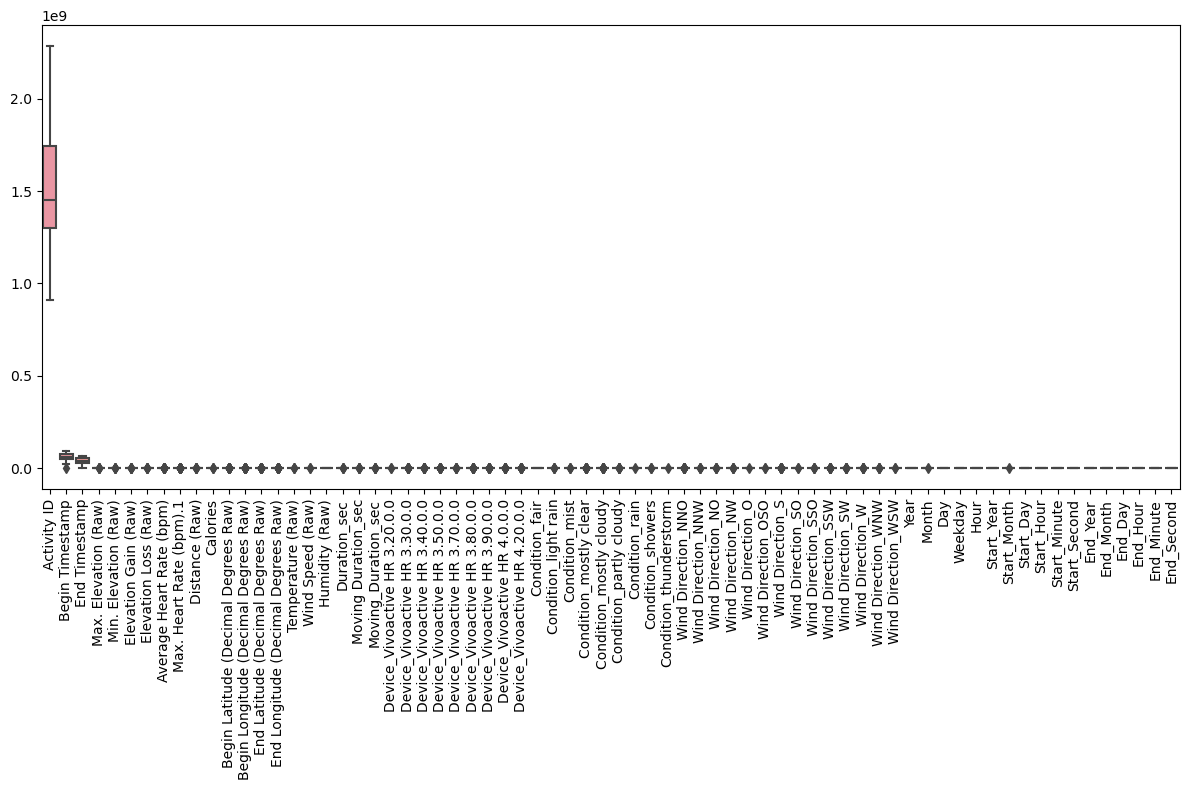

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()
